<a href="https://colab.research.google.com/github/HoangQuanHCMUTEK19/CNN/blob/main/Cirfar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten,Conv2D,MaxPooling2D
from keras.datasets import mnist, fashion_mnist, cifar10, cifar100
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v2 as tf
from tensorflow import keras

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 21s 0us/step


In [ ]:
#Doi du lieu ve dang float32 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Chuyen du lieu ve 0 va  1 
x_train /= 255
x_test /= 255
#chuyển đổi vectơ lớp thành ma trận lớp nhị phân
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
#Tao model 
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 4096)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [ ]:
#Compile model 
opt= SGD(lr=0.01,momentum = 0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#Train model 
history = model.fit(x_train, y_train, epochs= 20, batch_size=64, validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
782/782 [==============================] - 13s 16ms/step - loss: 0.1959 - accuracy: 0.9319 - val_loss: 1.2259 - val_accuracy: 0.7075
Epoch 2/20
782/782 [==============================] - 10s 13ms/step - loss: 0.1571 - accuracy: 0.9462 - val_loss: 1.3564 - val_accuracy: 0.7079
Epoch 3/20
782/782 [==============================] - 11s 15ms/step - loss: 0.1167 - accuracy: 0.9602 - val_loss: 1.4688 - val_accuracy: 0.7131
Epoch 4/20
782/782 [==============================] - 12s 15ms/step - loss: 0.0935 - accuracy: 0.9691 - val_loss: 1.5627 - val_accuracy: 0.7050
Epoch 5/20
782/782 [==============================] - 13s 17ms/step - loss: 0.0752 - accuracy: 0.9750 - val_loss: 1.6439 - val_accuracy: 0.7046
Epoch 6/20
782/782 [==============================] - 12s 16ms/step - loss: 0.0695 - accuracy: 0.9769 - val_loss: 1.6782 - val_accuracy: 0.7059
Epoch 7/20
782/782 [==============================] - 12s 16ms/step - loss: 0.0588 - accuracy: 0.9806 - val_loss: 1.8368 - val_accuracy:

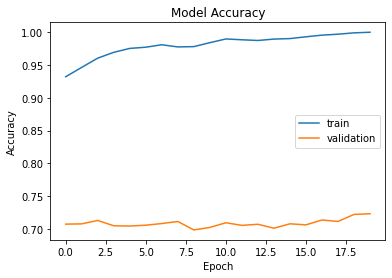

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()

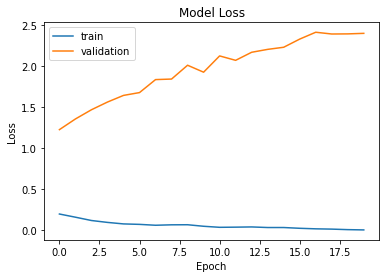

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()

In [ ]:
score = model.evaluate(x_test,y_test,verbose = 0)
print('Sai so kiem tra la:',score[0])
print('Do chinh xac kiem tra', score[1])

Sai so kiem tra la: 2.4013893604278564
Do chinh xac kiem tra 0.7232999801635742


In [ ]:
label=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Day la airplane


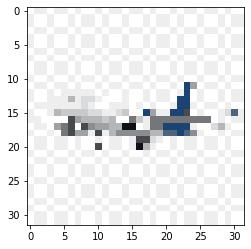

In [ ]:
#Load anh va hien thi anh 
img = tf.keras.utils.load_img('/content/png-clipart-airplane-aircraft-plane-mode-of-transport-flight-thumbnail.png',target_size=(32,32))
plt.imshow(img)
img = tf.keras.utils.img_to_array(img)
img=img.reshape(1,32,32,3)
img = img.astype('float32')
img = img/255
#Du doan hinh anh 
print('Day la ' + label[np.argmax(model.predict(img))])

Day la truck


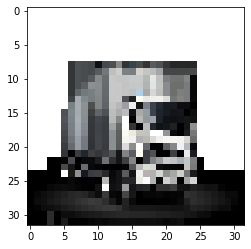

In [ ]:
#Load anh va hien thi anh
img1 = tf.keras.utils.load_img('/content/modelthumb-axor-distribution-id.png',target_size=(32,32))
plt.imshow(img1)
img1 = tf.keras.utils.img_to_array(img1)
img1 =img1.reshape(1,32,32,3)
img1 = img1.astype('float32')
img1 = img1/255
#Du doan hinh anh 
print('Day la ' + label[np.argmax(model.predict(img1))])